In [1]:
import numpy as np
import seaborn as sns
import matplotlib
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
sns.set_style("darkgrid", {"axes.facecolor": ".95"})

In [12]:
data = pd.read_csv('wine.csv')
data.head(0)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment


In [4]:
X = data.loc[:, "Total_Phenols":"Customer_Segment"]
y = data.Ash

In [5]:
data.shape

(178, 14)

In [6]:
pca = PCA(0.95)
X_pca = pca.fit_transform(data)

In [7]:
pca.components_.shape
pca.explained_variance_ratio_

array([0.99808763])

In [8]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X_pca[:17])

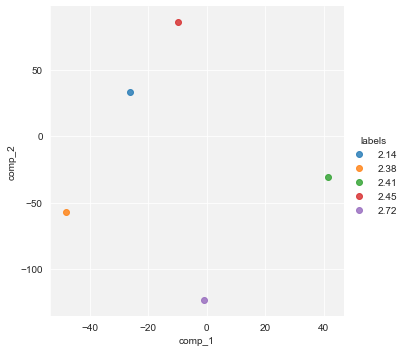

In [9]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(X_tsne)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y
sns.lmplot("comp_1", "comp_2", hue="labels", data=proj.sample(5), fit_reg=False)